# Flux Redshift SED model

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)
import scipy.stats
import sys
import os
sys.path.append('../')
#from delight.io import *
#from delight.utils import *
#from delight.photoz_gp import PhotozGP

In [23]:
from delight.io import *
from delight.utils import *

In [9]:
from pkg_resources import resource_filename

In [10]:
basedelight_datapath = resource_filename('delight', '../data')

In [11]:
topdir=os.path.join(basedelight_datapath,"CWW_SEDs")

In [24]:
configfilename="../analysis_input_rail/tmp/parametersTest.cfg"

In [25]:
files_sed_cww=["El_B2004a_fluxredshiftmod.txt","SB2_B2004a_fluxredshiftmod.txt","Sbc_B2004a_fluxredshiftmod.txt",
               "ssp_25Myr_z008_fluxredshiftmod.txt","Im_B2004a_fluxredshiftmod.txt","SB3_B2004a_fluxredshiftmod.txt",
               "Scd_B2004a_fluxredshiftmod.txt","ssp_5Myr_z008_fluxredshiftmod.txt"]

In [39]:
NSED=len(files_sed_cww)
NSED

8

In [26]:
# decode the parameters
params = parseParamFile(configfilename, verbose=False, catFilesNeeded=False)
bandNames = params['bandNames']
dir_seds = params['templates_directory']
dir_filters = params['bands_directory']
lambdaRef = params['lambdaRef']
sed_names = params['templates_names']
fmt = '.dat'
  

#redshift grid
redshiftDistGrid, redshiftGrid, redshiftGridGP = createGrids(params)
numZ = redshiftGrid.size

In [51]:
bandNames

['lsst_u', 'lsst_g', 'lsst_r', 'lsst_i', 'lsst_z', 'lsst_y']

In [5]:
index = 0

In [6]:
filename=files_sed_cww[index]

In [68]:
filename.split("_fluxredshiftmod")

['ssp_5Myr_z008', '.txt']

In [14]:
fullfilename=os.path.join(topdir,filename)

In [15]:
flux=np.loadtxt(fullfilename)

In [18]:
flux.shape

(3001, 6)

In [36]:
colorflux= ['b','g','r','orange','grey','k']

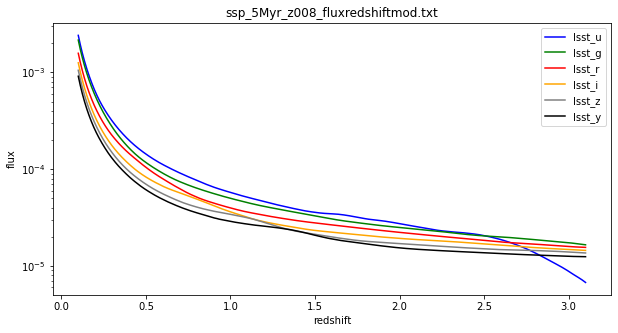

In [54]:
for ifilt in np.arange(6):
    plt.plot(redshiftGrid,flux[:,ifilt],color=colorflux[ifilt],label=bandNames[ifilt])
plt.yscale("log")
plt.xlabel("redshift")
plt.ylabel("flux")
plt.title(filename)
plt.legend()

# A) Filter - Redshift Model 

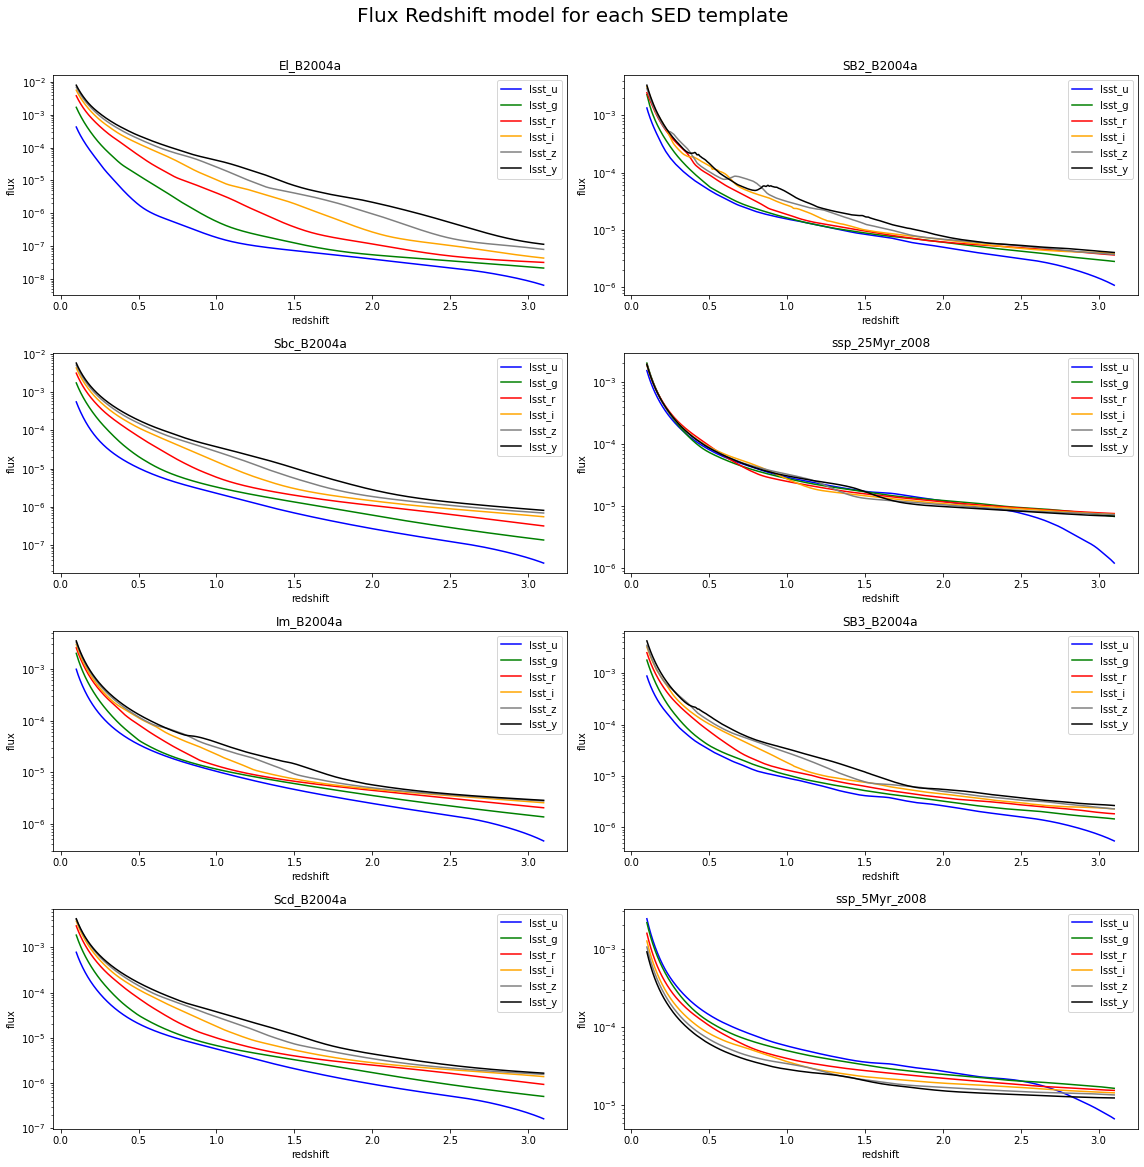

In [69]:
fig=plt.figure(figsize=(16,16))
ncol=2
nrow=4

iframe0=nrow*100+ncol*10

for ised in np.arange(NSED):
    iframe=iframe0+ised+1
    ax=fig.add_subplot(iframe)
    filename=files_sed_cww[ised]
    sedname=filename.split("_fluxredshiftmod")[0]
    fullfilename=os.path.join(topdir,filename)
    flux=np.loadtxt(fullfilename)
    for ifilt in np.arange(6):
        ax.plot(redshiftGrid,flux[:,ifilt],color=colorflux[ifilt],label=bandNames[ifilt])
    ax.set_yscale("log")
    ax.set_xlabel("redshift")
    ax.set_ylabel("flux")
    ax.set_title(sedname)
    ax.legend()
    
plt.suptitle("Flux Redshift model for each SED template",y=1.01,fontsize=20)
plt.tight_layout()
    

In [73]:
#for ifilt in np.arange(6):
#    print(ifilt,ifilt//3,ifilt-(ifilt//3)*3)

# Compare the Fluxes SED in the same filter

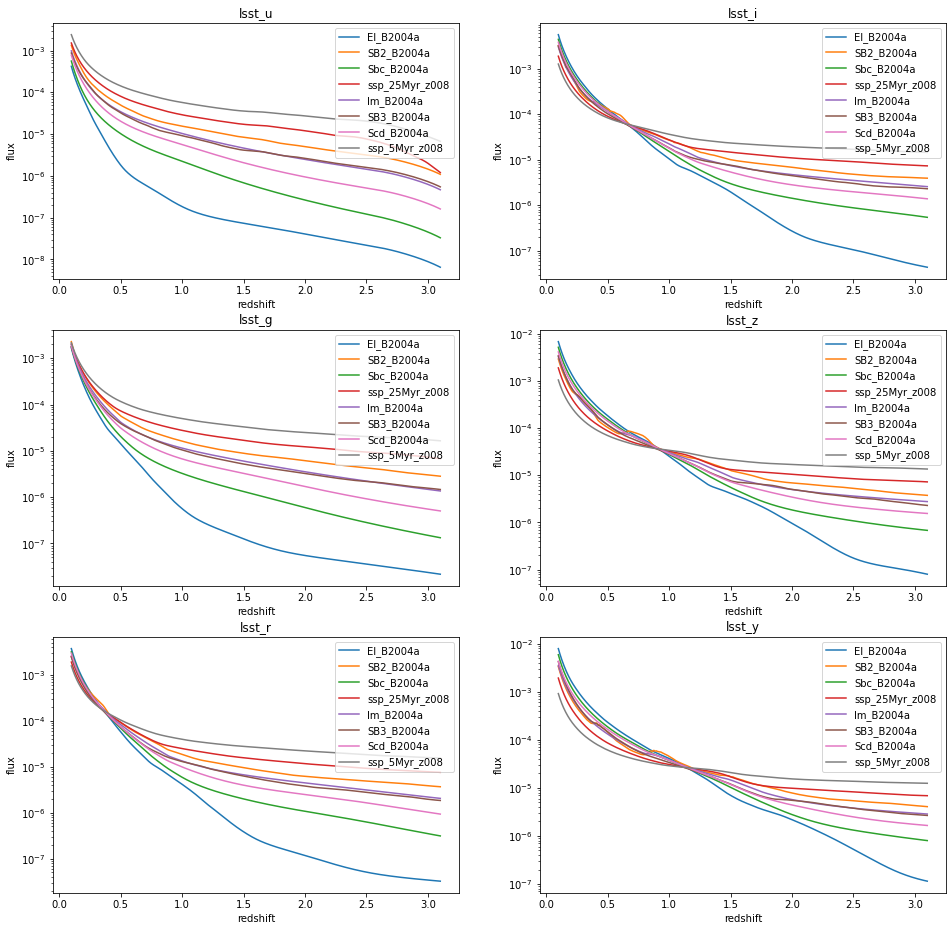

In [72]:
ncol=2
nrow=3
fig, axes = plt.subplots(nrow, ncol,figsize=(16,16)) 

for ised in np.arange(NSED):
    filename=files_sed_cww[ised]
    sedname=filename.split("_fluxredshiftmod")[0]
    fullfilename=os.path.join(topdir,filename)
    flux=np.loadtxt(fullfilename)
    for ifilt in np.arange(6):
        ix=ifilt//3
        iy=ifilt-ix*3
        
        axes[iy,ix].plot(redshiftGrid,flux[:,ifilt],label=sedname)
        axes[iy,ix].legend(loc="upper right")
        if ised==0:
            axes[iy,ix].set_yscale("log")
            axes[iy,ix].set_title(bandNames[ifilt])
            axes[iy,ix].set_xlabel("redshift")
            axes[iy,ix].set_ylabel("flux")
            
    
